# Large Point Source (LPS) NAEI Emission data
### The NAEI receives detailed data on individual sources in the industrial and commercial sector, also called ‘point sources’. A point source is an emission source at a known location, which has grid references and therefore, it can be mapped directly. 

# This part focuses on following

### 1. Analyse total emission by sectors and years
### 2. Select data year 2021
### 3. Analyse the total emissions by sectors
### 4. Analyse the total emissions by pollutant
### 5. Select the data with high emitting pollutants only: CO2
### 6. Remove major and minor power producers 

In [1]:
import os
import pandas as pd

In [2]:
from IPython.display import display, HTML

display(HTML("<style>.container { width:100% !important; }</style>"))

In [3]:
file_path = "C:/Users/USER/Desktop/MSc_Data_Science/Ind_Project/GHD/Project/Data/NAEI.csv"

# Load the CSV file into a DataFrame
df = pd.read_csv(file_path, encoding='latin1')

# Display DataFrame
df

,Year,PollutantID,Pollutant_Name,PlantID,Site,Easting,Northing,Operator,SectorID,Sector,Emission,Unit,Region,Datatype
0,2005,2,Carbon Dioxide as Carbon,25,Coventry,434800.0,282300.0,Acordis Acetate Chemicals Ltd,10,Chemical industry,9490.909091,Tonnes,England,O
1,2005,2,Carbon Dioxide as Carbon,28,Spondon,439600.0,336000.0,Acordis Acetate Chemicals Ltd,10,Chemical industry,1767.086904,Tonnes,England,O
2,2006,2,Carbon Dioxide as Carbon,28,Spondon,439600.0,336000.0,Acordis Acetate Chemicals Ltd,10,Chemical industry,1489.706990,Tonnes,England,O
3,2005,2,Carbon Dioxide as Carbon,84,Middlesbrough,458190.0,520340.0,Air Products Plc,3,Oil & gas exploration and production,22854.545450,Tonnes,England,O
4,2006,2,Carbon Dioxide as Carbon,84,Middlesbrough,458190.0,520340.0,Air Products Plc,3,Oil & gas exploration and production,21272.727270,Tonnes,England,O
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1037875,2021,250,Black Carbon,43220,Huntingdon Cemetry and Crematorium,525556.0,275432.0,Huntingdon Cemetry and Crematorium,25,Miscellaneous,0.000000,Tonnes,England,O
1037876,2021,250,Black Carbon,43221,Eden Valley Crematorium,359399.0,528240.0,Eden Valley Crematorium,25,Miscellaneous,0.000000,Tonnes,England,O
1037877,2021,250,Black Carbon,43222,Hurlet Crematorium,251311.0,660749.0,Hurlet Crematorium,25,Miscellaneous,0.000000,Tonnes,Scotland,O
1037878,2020,250,Black Carbon,43224,Milton Keynes Waste Recovery Park,481106.0,241698.0,AmeyCespa Limited,23,Commercial,0.040000,Tonnes,England,M


In [4]:
total_rows = len(df)
total_rows

1037880

In [5]:
df.head(24)

,Year,PollutantID,Pollutant_Name,PlantID,Site,Easting,Northing,Operator,SectorID,Sector,Emission,Unit,Region,Datatype
0,2005,2,Carbon Dioxide as Carbon,25,Coventry,434800.0,282300.0,Acordis Acetate Chemicals Ltd,10,Chemical industry,9490.909091,Tonnes,England,O
1,2005,2,Carbon Dioxide as Carbon,28,Spondon,439600.0,336000.0,Acordis Acetate Chemicals Ltd,10,Chemical industry,1767.086904,Tonnes,England,O
2,2006,2,Carbon Dioxide as Carbon,28,Spondon,439600.0,336000.0,Acordis Acetate Chemicals Ltd,10,Chemical industry,1489.706990,Tonnes,England,O
3,2005,2,Carbon Dioxide as Carbon,84,Middlesbrough,458190.0,520340.0,Air Products Plc,3,Oil & gas exploration and production,22854.545450,Tonnes,England,O
4,2006,2,Carbon Dioxide as Carbon,84,Middlesbrough,458190.0,520340.0,Air Products Plc,3,Oil & gas exploration and production,21272.727270,Tonnes,England,O
5,2005,2,Carbon Dioxide as Carbon,124,Rogestone,326560.0,187930.0,Alcan Rolled Products UK,14,Non-ferrous metal industries,5184.545455,Tonnes,Wales,O
6,2006,2,Carbon Dioxide as Carbon,124,Rogestone,326560.0,187930.0,Alcan Rolled Products UK,14,Non-ferrous metal industries,6720.000000,Tonnes,Wales,O
7,2005,2,Carbon Dioxide as Carbon,156,Seal Sands,452150.0,524260.0,Amoco (UK) Exploration Co Ltd,3,Oil & gas exploration and production,15116.771740,Tonnes,England,O
8,2006,2,Carbon Dioxide as Carbon,156,Seal Sands,452150.0,524260.0,Amoco (UK) Exploration Co Ltd,3,Oil & gas exploration and production,13772.290800,Tonnes,England,O
9,2007,2,Carbon Dioxide as Carbon,156,Seal Sands,452150.0,524260.0,Amoco (UK) Exploration Co Ltd,3,Oil & gas exploration and production,13044.790080,Tonnes,England,O


# Emissions of sector & year

Sector  Agriculture, forestry & fishing        Cement  Chemical industry  \
Year                                                                       
2005                       22830.063484  2.693023e+06       3.808612e+06   
2006                       20339.692336  2.774061e+06       3.589013e+06   
2007                       24319.009370  2.922793e+06       3.656929e+06   
2008                       23732.566888  2.394576e+06       3.396856e+06   
2009                       30856.097824  1.633124e+06       2.860368e+06   
2010                       36391.485079  1.662560e+06       2.902887e+06   
2011                       30071.472677  1.760105e+06       2.802096e+06   
2012                       27273.534630  1.612042e+06       2.951010e+06   
2013                       19569.820097  1.734752e+06       3.014686e+06   
2014                       20735.737406  1.813796e+06       2.599013e+06   
2015                       23900.020110  1.914598e+06       2.717256e+06   
2016        

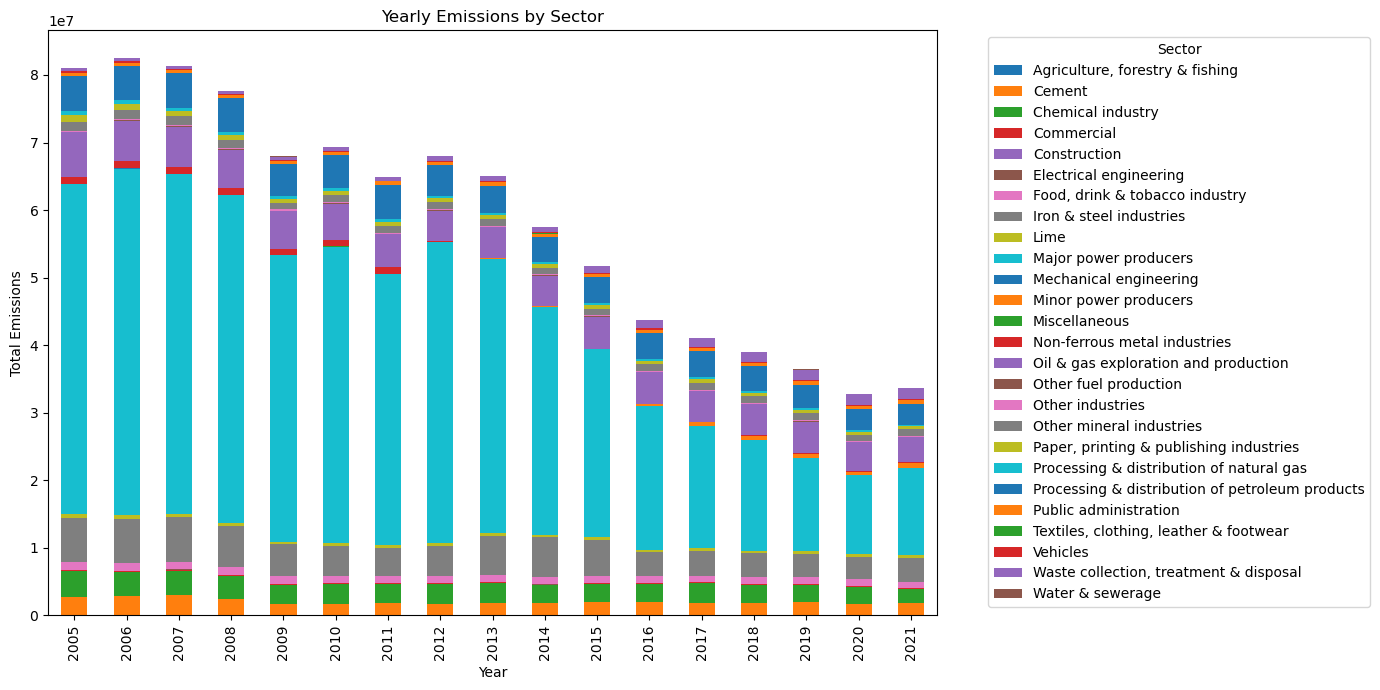

In [6]:
df.columns = df.columns.str.strip()

# Group the data by Year and Sector, then sum the Emissions
yearly_emissions_by_sector = df.groupby(['Year', 'Sector'])['Emission'].sum().reset_index()

# Pivot the data for better visualization
pivot_table = yearly_emissions_by_sector.pivot(index='Year', columns='Sector', values='Emission')

# Display the pivot table
print(pivot_table)

# plot the data
import matplotlib.pyplot as plt

pivot_table.plot(kind='bar', stacked=True, figsize=(14, 7))
plt.title('Yearly Emissions by Sector')
plt.xlabel('Year')
plt.ylabel('Total Emissions')
plt.legend(title='Sector', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


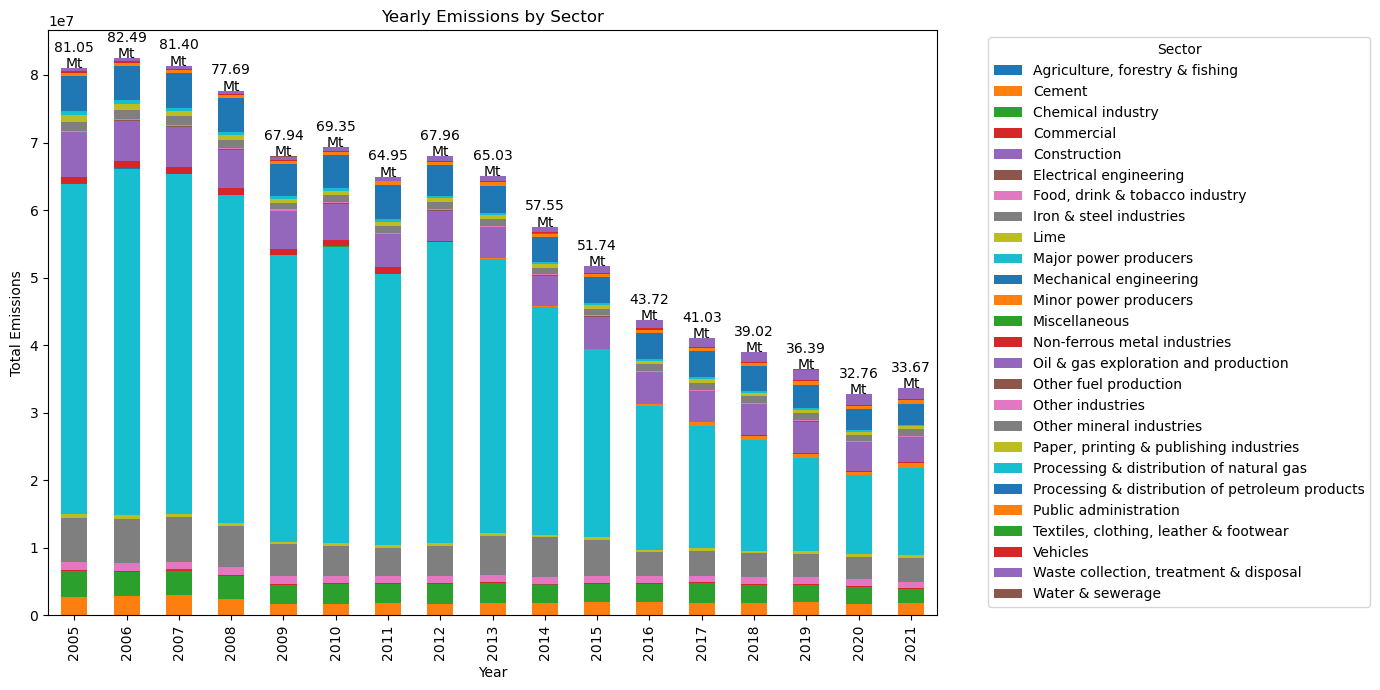

In [7]:
# Ensure total_emissions_by_year is a Series of numeric values
total_emissions_by_year = pivot_table.sum(axis=1)

# Plot the data with total emissions labeled at the top of the bar chart
ax = pivot_table.plot(kind='bar', stacked=True, figsize=(14, 7))
plt.title('Yearly Emissions by Sector')
plt.xlabel('Year')
plt.ylabel('Total Emissions')
plt.legend(title='Sector', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Add labels to the top of the bars with space and separate "Mt" below emission value
for i in range(len(total_emissions_by_year)):
    emission_mt = total_emissions_by_year.iloc[i] / 1e6
    ax.text(i, total_emissions_by_year.iloc[i] + 15, f'{emission_mt:.2f}\nMt', ha='center')

plt.show()


# Data from 2021 only

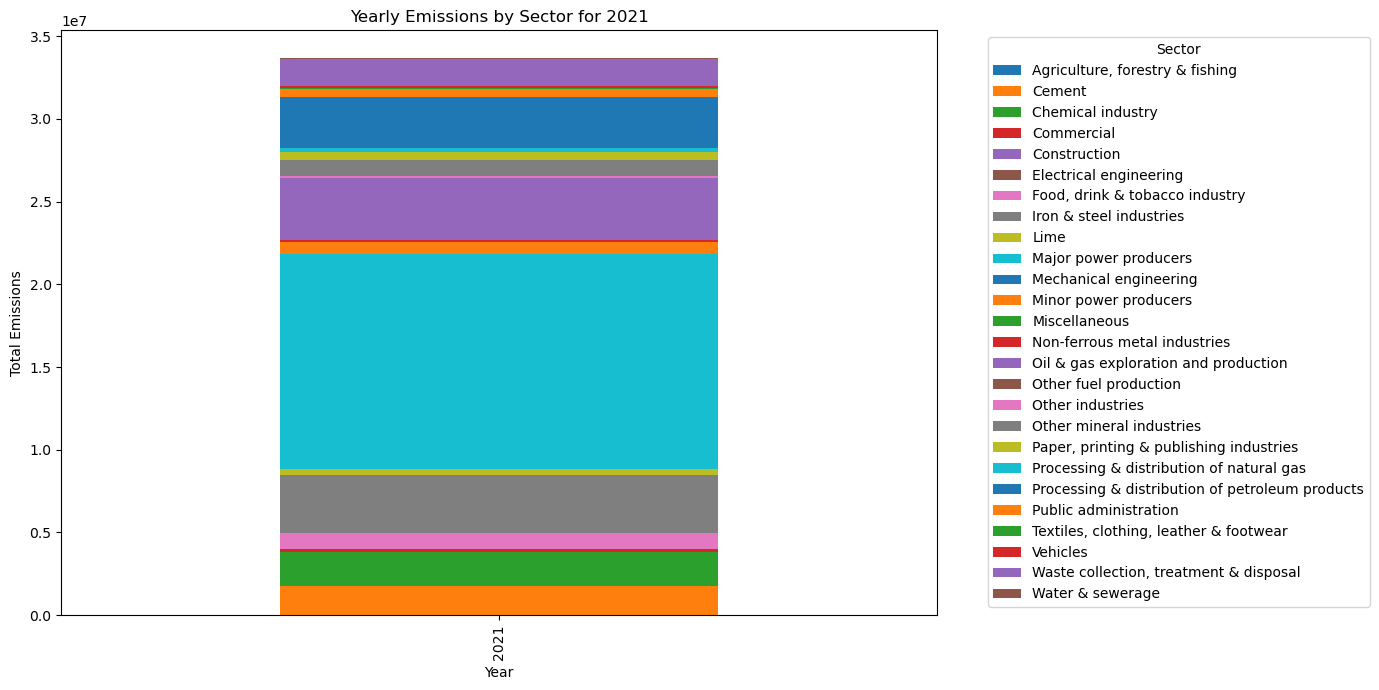

In [8]:
# Strip whitespace from column names
df.columns = df.columns.str.strip()

# Filter the data for Year = 2021
df_2021 = df[df['Year'] == 2021]

# Group the data by Year and Sector, then sum the Emissions
yearly_emissions_by_sector = df_2021.groupby(['Year', 'Sector'])['Emission'].sum().reset_index()

# Pivot the data for better visualization
pivot_table = yearly_emissions_by_sector.pivot(index='Year', columns='Sector', values='Emission')

# Display the pivot table
pivot_table

# Plot the data
pivot_table.plot(kind='bar', stacked=True, figsize=(14, 7))
plt.title('Yearly Emissions by Sector for 2021')
plt.xlabel('Year')
plt.ylabel('Total Emissions')
plt.legend(title='Sector', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


# Total Emission of all sectors in Year 2021

In [9]:
# Strip whitespace from column names
df.columns = df.columns.str.strip()

# Filter the data for Year = 2021
df_2021 = df[df['Year'] == 2021]

# Calculate the total emission for Year 2021
total_emission_2021 = df_2021['Emission'].sum()

total_emission_2021


33667121.661864065

# Filter the DataFrame by the Year 2021

In [10]:
# Filter the DataFrame by the Year 2021
df = df[df['Year'] == 2021]

df


,Year,PollutantID,Pollutant_Name,PlantID,Site,Easting,Northing,Operator,SectorID,Sector,Emission,Unit,Region,Datatype
23,2021,2,Carbon Dioxide as Carbon,156,Seal Sands,452150.0,524260.0,Amoco (UK) Exploration Co Ltd,3,Oil & gas exploration and production,15417.76663,Tonnes,England,O
46,2021,2,Carbon Dioxide as Carbon,345,Holywell,312200.0,383900.0,BHP Billiton Petroleum Ltd,3,Oil & gas exploration and production,12132.51428,Tonnes,Wales,O
74,2021,2,Carbon Dioxide as Carbon,396,Bacton,633190.0,334440.0,BP Amoco Exploration Ltd,3,Oil & gas exploration and production,25702.65050,Tonnes,England,O
94,2021,2,Carbon Dioxide as Carbon,419,Dimlington,539800.0,420300.0,BP Exploration Operating Co Ltd,3,Oil & gas exploration and production,33283.25842,Tonnes,England,O
111,2021,2,Carbon Dioxide as Carbon,422,Wareham,397500.0,85130.0,BP Exploration Operating Co Ltd,3,Oil & gas exploration and production,17818.04755,Tonnes,England,O
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1037874,2021,250,Black Carbon,43219,Tolmount NUI Platform,559875.0,463201.0,ODE Group,3,Oil & gas exploration and production,0.32000,Tonnes,Unallocated,O
1037875,2021,250,Black Carbon,43220,Huntingdon Cemetry and Crematorium,525556.0,275432.0,Huntingdon Cemetry and Crematorium,25,Miscellaneous,0.00000,Tonnes,England,O
1037876,2021,250,Black Carbon,43221,Eden Valley Crematorium,359399.0,528240.0,Eden Valley Crematorium,25,Miscellaneous,0.00000,Tonnes,England,O
1037877,2021,250,Black Carbon,43222,Hurlet Crematorium,251311.0,660749.0,Hurlet Crematorium,25,Miscellaneous,0.00000,Tonnes,Scotland,O


In [11]:
# Check for zero values in each column
zero_values = (df == 0).sum()

In [12]:
zero_values

Year                0
PollutantID         0
Pollutant_Name      0
PlantID             0
Site                0
Easting             0
Northing            0
Operator            0
SectorID            0
Sector              0
Emission          496
Unit                0
Region              0
Datatype            0
dtype: int64

In [13]:
# remove rows where the Emission column has 0 values
df = df[df['Emission'] != 0].dropna(subset=['Emission'])

df

,Year,PollutantID,Pollutant_Name,PlantID,Site,Easting,Northing,Operator,SectorID,Sector,Emission,Unit,Region,Datatype
23,2021,2,Carbon Dioxide as Carbon,156,Seal Sands,452150.0,524260.0,Amoco (UK) Exploration Co Ltd,3,Oil & gas exploration and production,15417.76663,Tonnes,England,O
46,2021,2,Carbon Dioxide as Carbon,345,Holywell,312200.0,383900.0,BHP Billiton Petroleum Ltd,3,Oil & gas exploration and production,12132.51428,Tonnes,Wales,O
74,2021,2,Carbon Dioxide as Carbon,396,Bacton,633190.0,334440.0,BP Amoco Exploration Ltd,3,Oil & gas exploration and production,25702.65050,Tonnes,England,O
94,2021,2,Carbon Dioxide as Carbon,419,Dimlington,539800.0,420300.0,BP Exploration Operating Co Ltd,3,Oil & gas exploration and production,33283.25842,Tonnes,England,O
111,2021,2,Carbon Dioxide as Carbon,422,Wareham,397500.0,85130.0,BP Exploration Operating Co Ltd,3,Oil & gas exploration and production,17818.04755,Tonnes,England,O
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1037855,2021,250,Black Carbon,43207,Bentham Fire Fighting Chemicals,366600.0,469100.0,Angus Fire Ltd,10,Chemical industry,0.08000,Tonnes,England,O
1037872,2021,250,Black Carbon,43215,Beryl SPM2 Loading Terminal,599706.0,1079065.0,Apache Corporation,3,Oil & gas exploration and production,4.86000,Tonnes,Unallocated,O
1037873,2021,250,Black Carbon,43217,Tethys Platform,668230.0,424799.0,Chrysaor North Sea Limited,3,Oil & gas exploration and production,0.03000,Tonnes,Unallocated,O
1037874,2021,250,Black Carbon,43219,Tolmount NUI Platform,559875.0,463201.0,ODE Group,3,Oil & gas exploration and production,0.32000,Tonnes,Unallocated,O


In [14]:
# Check for zero values in each column
zero_values = (df == 0).sum()
zero_values

Year              0
PollutantID       0
Pollutant_Name    0
PlantID           0
Site              0
Easting           0
Northing          0
Operator          0
SectorID          0
Sector            0
Emission          0
Unit              0
Region            0
Datatype          0
dtype: int64

In [15]:
# Count the total number of rows in the DataFrame
total_rows = len(df)
total_rows

69705

In [16]:
# Strip whitespace from column names
df.columns = df.columns.str.strip()

# Filter the data for Year = 2021
df_2021 = df[df['Year'] == 2021]

# Calculate the total emission for Year 2021
total_emission_2021 = df_2021['Emission'].sum()

total_emission_2021

33667121.661864065

# Sectors & Emission

In [17]:
# Strip any spaces from column names
df.columns = df.columns.str.strip()

# grouping by 'Sector' and sum the 'Emission' values
sector_emissions = df.groupby('Sector')['Emission'].sum().reset_index()

# Display the result
print(sector_emissions)

                                             Sector      Emission
0                   Agriculture, forestry & fishing  3.433866e+04
1                                            Cement  1.750442e+06
2                                 Chemical industry  2.034029e+06
3                                        Commercial  1.744128e+05
4                                      Construction  1.041118e+03
5                            Electrical engineering  2.641956e+04
6                    Food, drink & tobacco industry  9.585982e+05
7                           Iron & steel industries  3.469644e+06
8                                              Lime  4.121117e+05
9                             Major power producers  1.294743e+07
10                           Mechanical engineering  5.619412e+03
11                            Minor power producers  7.505387e+05
12                                    Miscellaneous  6.847165e+03
13                     Non-ferrous metal industries  9.750383e+04
14        

In [18]:
# Sort the results by the sum of emissions in descending order
sector_emissions = sector_emissions.sort_values(by='Emission', ascending=False)

# Display the sorted result
print(sector_emissions)


                                             Sector      Emission
9                             Major power producers  1.294743e+07
14             Oil & gas exploration and production  3.743153e+06
7                           Iron & steel industries  3.469644e+06
20  Processing & distribution of petroleum products  3.082556e+06
2                                 Chemical industry  2.034029e+06
1                                            Cement  1.750442e+06
24           Waste collection, treatment & disposal  1.676673e+06
6                    Food, drink & tobacco industry  9.585982e+05
17                         Other mineral industries  9.571324e+05
11                            Minor power producers  7.505387e+05
21                            Public administration  5.112835e+05
18          Paper, printing & publishing industries  4.552300e+05
8                                              Lime  4.121117e+05
19         Processing & distribution of natural gas  2.549910e+05
3         

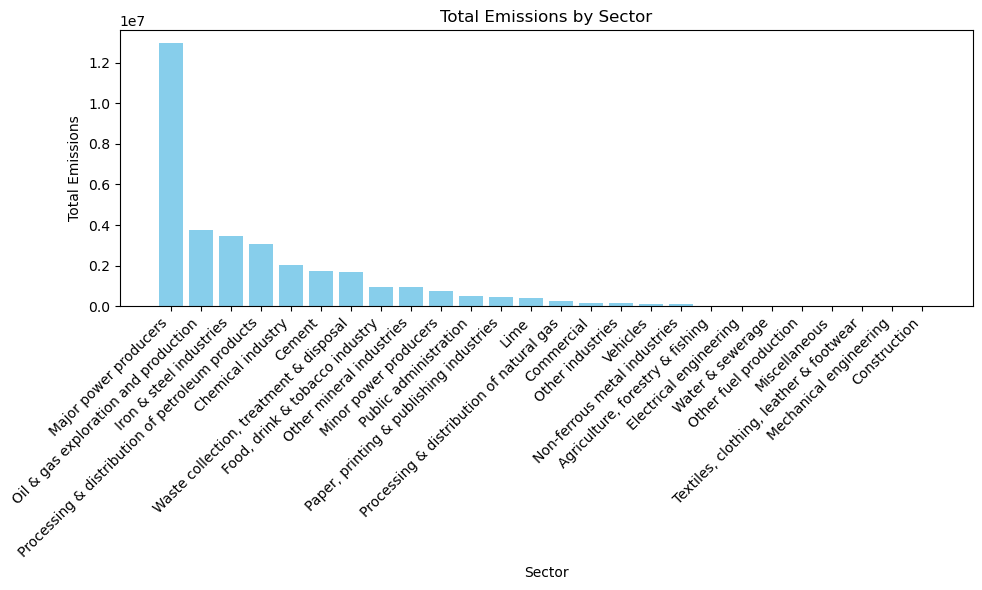

In [19]:
import matplotlib.pyplot as plt

# Plot the results
plt.figure(figsize=(10, 6))
plt.bar(sector_emissions['Sector'], sector_emissions['Emission'], color='skyblue')
plt.xlabel('Sector')
plt.ylabel('Total Emissions')
plt.title('Total Emissions by Sector')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [20]:
# Calculate the percentage of emissions for each sector
total_emissions = sector_emissions['Emission'].sum()
sector_emissions['Percentage'] = (sector_emissions['Emission'] / total_emissions) * 100

sector_emissions


,Sector,Emission,Percentage
9,Major power producers,1.294743e+07,38.457188
14,Oil & gas exploration and production,3.743153e+06,11.118127
7,Iron & steel industries,3.469644e+06,10.305735
20,Processing & distribution of petroleum products,3.082556e+06,9.155984
2,Chemical industry,2.034029e+06,6.041587
1,Cement,1.750442e+06,5.199261
24,"Waste collection, treatment & disposal",1.676673e+06,4.980149
6,"Food, drink & tobacco industry",9.585982e+05,2.847283
17,Other mineral industries,9.571324e+05,2.842929
11,Minor power producers,7.505387e+05,2.229293


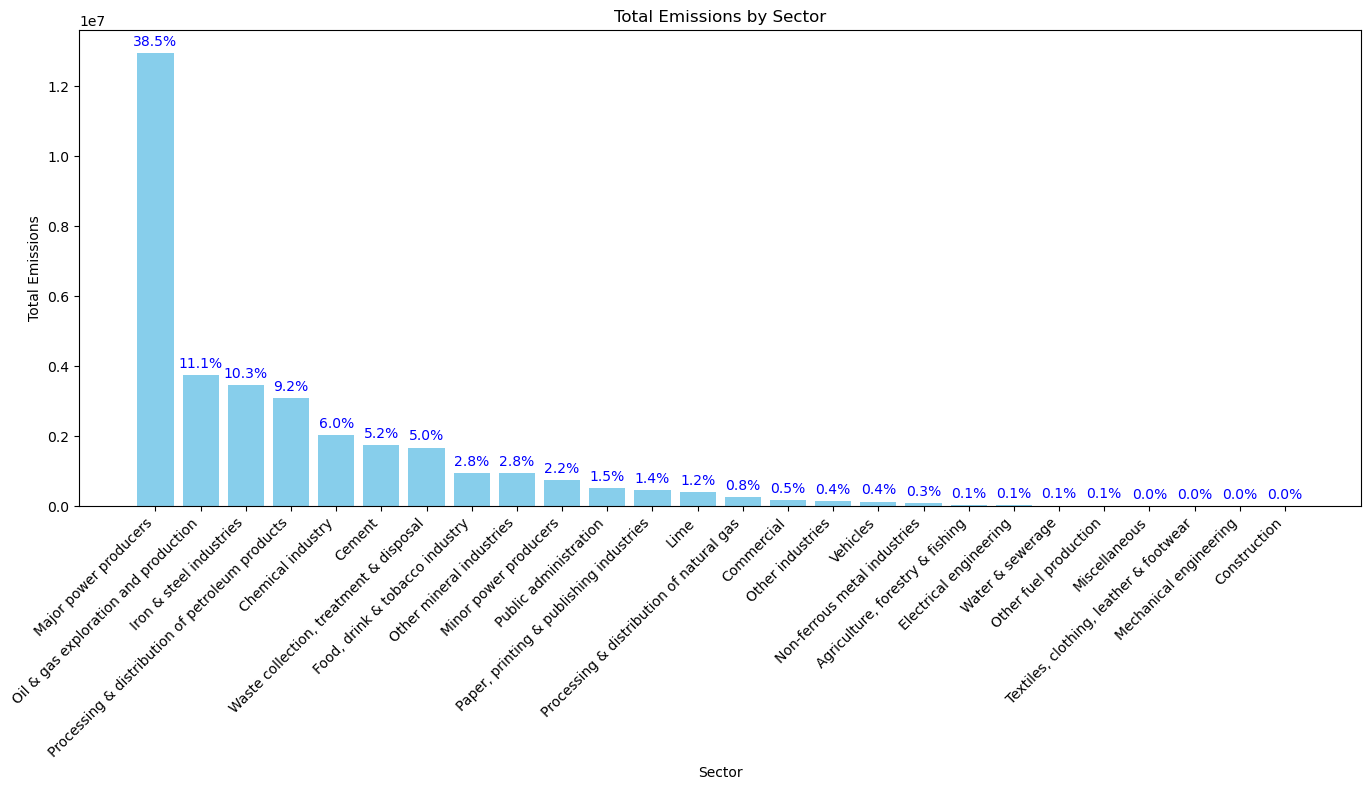

In [21]:
# Sort the sector_emissions DataFrame by 'Emission' in descending order
sector_emissions_sorted = sector_emissions.sort_values(by='Emission', ascending=False).reset_index(drop=True)

# Plot the bar chart with percentages displayed on top of each bar
plt.figure(figsize=(14, 8))
bars = plt.bar(sector_emissions_sorted['Sector'], sector_emissions_sorted['Emission'], color='skyblue')
plt.xlabel('Sector')
plt.ylabel('Total Emissions')
plt.title('Total Emissions by Sector')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Annotate the bars with the percentage values at the top
for bar, pct in zip(bars, sector_emissions_sorted['Percentage']):
    height = bar.get_height()
    plt.annotate(f'{pct:.1f}%', xy=(bar.get_x() + bar.get_width() / 2, height), xytext=(0, 3),  # 3 points vertical offset
                 textcoords="offset points", ha='center', va='bottom', fontsize=10, color='blue')

plt.show()


In [22]:
# Strip any leading/trailing spaces from column names
df.columns = df.columns.str.strip()

# Calculate the total emissions
total_emissions = df['Emission'].sum()

# Display the total emissions
print(f"Total Emissions: {total_emissions}")


Total Emissions: 33667121.661864065


# Emission by pollutant

In [23]:
# Strip any leading/trailing spaces from column names
df.columns = df.columns.str.strip()

# Perform the grouping by 'Pollutant_Name' and sum the 'Emission' values
pollutant_emissions = df.groupby('Pollutant_Name')['Emission'].sum().reset_index()

# Sort the results by the sum of emissions in descending order
pollutant_emissions = pollutant_emissions.sort_values(by='Emission', ascending=False)

# Display the result
print(pollutant_emissions)


                        Pollutant_Name      Emission
9             Carbon Dioxide as Carbon  3.281089e+07
10                     Carbon Monoxide  3.286410e+05
21              Nitrogen Oxides as NO2  1.882440e+05
23                     Non Methane VOC  1.858105e+05
30                     Sulphur Dioxide  5.620734e+04
19                             Methane  4.746147e+04
26    PM10 (Particulate Matter < 10µm)  1.453454e+04
27  PM2.5 (Particulate Matter < 2.5µm)  1.108316e+04
25      PM1 (Particulate Matter < 1µm)  7.786112e+03
22                       Nitrous Oxide  3.855685e+03
1                              Ammonia  3.262333e+03
15                   Hydrogen Chloride  3.062454e+03
24  PM0.1 (Particulate Matter < 0.1µm)  3.008887e+03
7                         Black Carbon  1.890357e+03
3                              Benzene  1.066632e+03
32                                Zinc  1.208159e+02
0                         13-butadiene  8.823811e+01
17                                Lead  5.1013

In [24]:
# # Strip any leading/trailing spaces from column names
# df.columns = df.columns.str.strip()

# Perform the grouping by 'Pollutant_Name' and sum the 'Emission' values
pollutant_emissions = df.groupby('Pollutant_Name')['Emission'].sum().reset_index()

# Sort the results by the pollutant's name
pollutant_emissions = pollutant_emissions.sort_values(by='Pollutant_Name')

# Display the result
print(pollutant_emissions)


                        Pollutant_Name      Emission
0                         13-butadiene  8.823811e+01
1                              Ammonia  3.262333e+03
2                              Arsenic  3.599371e+00
3                              Benzene  1.066632e+03
4                       Benzo[a]pyrene  1.459622e-01
5                 Benzo[b]fluoranthene  1.308274e-01
6                 Benzo[k]fluoranthene  7.389036e-02
7                         Black Carbon  1.890357e+03
8                              Cadmium  1.206906e+00
9             Carbon Dioxide as Carbon  3.281089e+07
10                     Carbon Monoxide  3.286410e+05
11                            Chromium  9.404535e+00
12                              Copper  9.008172e+00
13                    Dioxins (PCDD/F)  1.626627e-05
14                   Hexachlorobenzene  5.463021e-02
15                   Hydrogen Chloride  3.062454e+03
16                Indeno[123-cd]pyrene  6.147227e-02
17                                Lead  5.1013

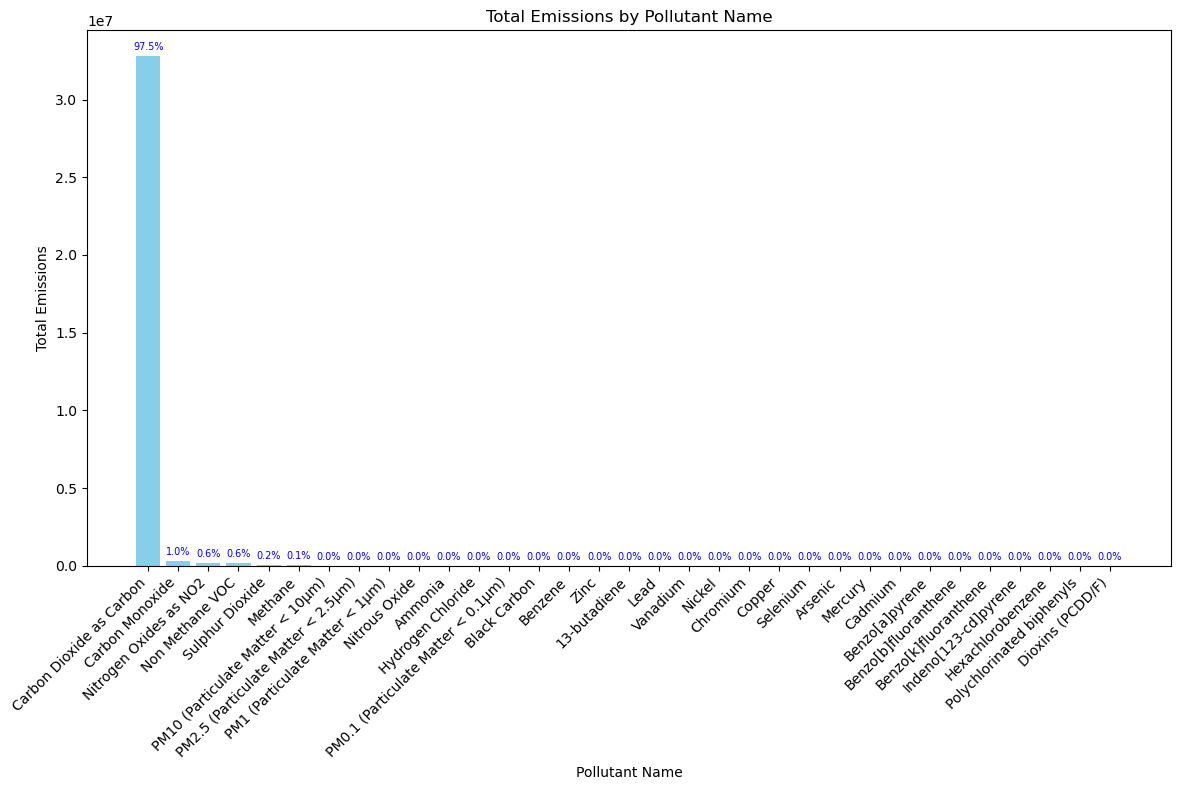

In [25]:
import matplotlib.pyplot as plt


# Calculate the percentage of emissions for each pollutant
total_emissions = pollutant_emissions['Emission'].sum()
pollutant_emissions['Percentage'] = (pollutant_emissions['Emission'] / total_emissions) * 100

# Sort the pollutant_emissions DataFrame by 'Emission' in descending order
pollutant_emissions_sorted = pollutant_emissions.sort_values(by='Emission', ascending=False).reset_index(drop=True)

# Plot the bar chart with percentages displayed on top of each bar
plt.figure(figsize=(12, 8))
bars = plt.bar(pollutant_emissions_sorted['Pollutant_Name'], pollutant_emissions_sorted['Emission'], color='skyblue')
plt.xlabel('Pollutant Name')
plt.ylabel('Total Emissions')
plt.title('Total Emissions by Pollutant Name')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Annotate the bars with the percentage values at the top
for bar, pct in zip(bars, pollutant_emissions_sorted['Percentage']):
    height = bar.get_height()
    plt.annotate(f'{pct:.1f}%', xy=(bar.get_x() + bar.get_width() / 2, height), xytext=(0, 3),  # 3 points vertical offset
                 textcoords="offset points", ha='center', va='bottom', fontsize=7, color='blue')

plt.show()


# Select the data by pollutant = "Carbon Dioxide as Carbon"

In [26]:
df = df[df['Pollutant_Name'] == 'Carbon Dioxide as Carbon']

df


,Year,PollutantID,Pollutant_Name,PlantID,Site,Easting,Northing,Operator,SectorID,Sector,Emission,Unit,Region,Datatype
23,2021,2,Carbon Dioxide as Carbon,156,Seal Sands,452150.0,524260.0,Amoco (UK) Exploration Co Ltd,3,Oil & gas exploration and production,15417.766630,Tonnes,England,O
46,2021,2,Carbon Dioxide as Carbon,345,Holywell,312200.0,383900.0,BHP Billiton Petroleum Ltd,3,Oil & gas exploration and production,12132.514280,Tonnes,Wales,O
74,2021,2,Carbon Dioxide as Carbon,396,Bacton,633190.0,334440.0,BP Amoco Exploration Ltd,3,Oil & gas exploration and production,25702.650500,Tonnes,England,O
94,2021,2,Carbon Dioxide as Carbon,419,Dimlington,539800.0,420300.0,BP Exploration Operating Co Ltd,3,Oil & gas exploration and production,33283.258420,Tonnes,England,O
111,2021,2,Carbon Dioxide as Carbon,422,Wareham,397500.0,85130.0,BP Exploration Operating Co Ltd,3,Oil & gas exploration and production,17818.047550,Tonnes,England,O
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24871,2021,2,Carbon Dioxide as Carbon,43174,Viridis 178 Red Scar,357730.0,431960.0,Conrad (Redscar) Ltd,18,Major power producers,7848.818182,Tonnes,England,O
24872,2021,2,Carbon Dioxide as Carbon,43186,Chichester Food Factory,485410.0,104240.0,Babynov Chichester Ltd,5,"Food, drink & tobacco industry",652.909091,Tonnes,England,O
24873,2021,2,Carbon Dioxide as Carbon,43217,Tethys Platform,668230.0,424799.0,Chrysaor North Sea Limited,3,Oil & gas exploration and production,21.801014,Tonnes,Offshore,O
24874,2021,2,Carbon Dioxide as Carbon,43219,Tolmount NUI Platform,559875.0,463201.0,ODE Group,3,Oil & gas exploration and production,257.974807,Tonnes,Offshore,O


# Total emissions with CO2 pollutant only

In [27]:
# Calculate the total emissions
total_emissions = df['Emission'].sum()

# Display the total emissions
print(f"Total Emissions: {total_emissions}")


Total Emissions: 32810889.24530632


## Remove the sectors which will be hard to abate by electricity Oil & gas exploration and production', 'Processing & distribution of natural gas',  'Iron & steel industries', 'Other fuel production', 'Major power producers', 'Processing & distribution of petroleum products', 'Agriculture, forestry & fishing', 'Minor power producers'

In [30]:
# Drop rows where 'column_name' is either 'value1' or 'value2'
df = df[~df['Sector'].isin(['Oil & gas exploration and production', 'Processing & distribution of natural gas',  
                            'Iron & steel industries', 'Other fuel production', 'Major power producers', 
                            'Processing & distribution of petroleum products', 'Agriculture, forestry & fishing', 
                            'Minor power producers'])]

# Recalculating the total emissions after removing above mentioned sectors

In [31]:
# Strip any leading/trailing spaces from column names
df.columns = df.columns.str.strip()

# Calculate the total emissions
total_emissions = df['Emission'].sum()

# Display the total emissions
print(f"Total Emissions: {total_emissions}")

Total Emissions: 9025562.43725411


In [32]:
df

,Year,PollutantID,Pollutant_Name,PlantID,Site,Easting,Northing,Operator,SectorID,Sector,Emission,Unit,Region,Datatype
148,2021,2,Carbon Dioxide as Carbon,669,South Wirral,342000.0,376000.0,Cleanaway Ltd,21,"Waste collection, treatment & disposal",24195.193910,Tonnes,England,M
259,2021,2,Carbon Dioxide as Carbon,786,Coventry,434700.0,277670.0,Coventry & Solihull Waste Disposal Co Ltd,21,"Waste collection, treatment & disposal",35687.856830,Tonnes,England,M
341,2021,2,Carbon Dioxide as Carbon,1000,Wrexham,338600.0,349750.0,Eurocare Environmental Services Ltd,21,"Waste collection, treatment & disposal",378.397317,Tonnes,Wales,M
392,2021,2,Carbon Dioxide as Carbon,1132,Stevenage,523570.0,223470.0,Glaxosmithkline Research & Development Ltd,23,Commercial,538.383886,Tonnes,England,M
409,2021,2,Carbon Dioxide as Carbon,1173,Bolton,372800.0,407500.0,Greater Manchester Waste Ltd,21,"Waste collection, treatment & disposal",9841.473535,Tonnes,England,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24864,2021,2,Carbon Dioxide as Carbon,43122,Earls Gate Energy Centre,291678.0,681406.0,Earls Gate Energy Centre Ltd,21,"Waste collection, treatment & disposal",502.880168,Tonnes,Scotland,M
24868,2021,2,Carbon Dioxide as Carbon,43136,Bridgewater Diary,330050.0,133710.0,Muller UK and Ireland Group LLP,5,"Food, drink & tobacco industry",3296.722909,Tonnes,England,O
24869,2021,2,Carbon Dioxide as Carbon,43165,Carlisle Street East Works,436460.0,388520.0,Allegheny Technologies Ltd,14,Non-ferrous metal industries,2745.081818,Tonnes,England,O
24872,2021,2,Carbon Dioxide as Carbon,43186,Chichester Food Factory,485410.0,104240.0,Babynov Chichester Ltd,5,"Food, drink & tobacco industry",652.909091,Tonnes,England,O


# Export data 

In [33]:
file_path = "C:/Users/USER/Desktop/MSc_Data_Science/Ind_Project/GHD/Project/Data/NAEI_clean.csv"

# Export the DataFrame to a CSV file
df.to_csv(file_path, index=False)

# Import NAEI Selected data which includes only Great Britain

## NAEI_clean.csv populated in ArcGIS Pro and clipped data so it only contains the emission data within GB boundaries
## Data in Northern Ireland and offshore industrial sites are excluded

In [35]:
path = "C:/Users/USER/Desktop/MSc_Data_Science/Ind_Project/GHD/Project/Data/NAEI_Clean_GB.csv"

# Load the CSV file into a DataFrame
df = pd.read_csv(path, encoding='latin1')

# Display DataFrame
df

,OBJECTID,PlantID,Site,Easting,Northing,Operator,SectorID,Sector,Emission,Unit
0,1,669,South Wirral,342000,376000,Cleanaway Ltd,21,"Waste collection, treatment & disposal",24195.193910,Tonnes
1,2,786,Coventry,434700,277670,Coventry & Solihull Waste Disposal Co Ltd,21,"Waste collection, treatment & disposal",35687.856830,Tonnes
2,3,1000,Wrexham,338600,349750,Eurocare Environmental Services Ltd,21,"Waste collection, treatment & disposal",378.397317,Tonnes
3,4,1132,Stevenage,523570,223470,Glaxosmithkline Research & Development Ltd,23,Commercial,538.383886,Tonnes
4,5,1173,Bolton,372800,407500,Greater Manchester Waste Ltd,21,"Waste collection, treatment & disposal",9841.473535,Tonnes
...,...,...,...,...,...,...,...,...,...,...
1055,1056,43122,Earls Gate Energy Centre,291678,681406,Earls Gate Energy Centre Ltd,21,"Waste collection, treatment & disposal",502.880168,Tonnes
1056,1057,43136,Bridgewater Diary,330050,133710,Muller UK and Ireland Group LLP,5,"Food, drink & tobacco industry",3296.722909,Tonnes
1057,1058,43165,Carlisle Street East Works,436460,388520,Allegheny Technologies Ltd,14,Non-ferrous metal industries,2745.081818,Tonnes
1058,1059,43186,Chichester Food Factory,485410,104240,Babynov Chichester Ltd,5,"Food, drink & tobacco industry",652.909091,Tonnes


# Import fuel type use by industries

### 1. Fuel types are derviced from https://www.ons.gov.uk/economy/environmentalaccounts/datasets/ukenvironmentalaccountsfuelusebytypeandindustry
### 2. It includes coal, natural gas, petrol, DERV, fuel oil, gasoil and other fuel
### 3. this is derived by total fuel use of year 2021
### 4. Fuel type donot represent any electricity
### 5. It may not replicate the actual fuel use of industrial sites (i.e. a site may use coal and natural gas only

In [36]:
file_path = "C:/Users/USER/Desktop/MSc_Data_Science/Ind_Project/GHD/Project/Data/Sector_Fuel_and_EnergyUse_Data.csv"

# Load the CSV file into a DataFrame
fuel_use = pd.read_csv(file_path, encoding='latin1')

# Display DataFrame
fuel_use

,Sector,Coal_percent,NG_percent,Petro_percent,DERV_percent,Fueloil_percent,Gasoil_percent,Otherfuel_percent
0,"Agriculture, forestry & fishing",0.00,3.49,0.25,9.13,0.51,72.32,14.30
1,Cement,0.36,64.99,0.04,0.96,2.92,29.73,1.00
2,Chemical industry,13.25,57.01,0.25,8.12,0.31,1.46,19.59
3,Commercial,0.00,80.06,3.03,11.64,0.16,0.64,4.47
4,Construction,0.00,21.42,2.78,51.49,0.00,22.36,1.95
5,Electrical engineering,13.25,57.01,0.25,8.12,0.31,1.46,19.59
6,"Food, drink & tobacco industry",13.25,57.01,0.25,8.12,0.31,1.46,19.59
7,Iron & steel industries,13.25,57.01,0.25,8.12,0.31,1.46,19.59
8,Lime,13.25,57.01,0.25,8.12,0.31,1.46,19.59
9,Major power producers,7.21,89.98,0.01,0.36,0.88,0.00,1.56


# Merge NAEI emission data and fuel used by fuel types data

In [37]:
# Merging the dataframes on the 'Sector' column
df = df.merge(fuel_use, on='Sector', how='left')

# Display the first few rows of the merged dataframe
df

,OBJECTID,PlantID,Site,Easting,Northing,Operator,SectorID,Sector,Emission,Unit,Coal_percent,NG_percent,Petro_percent,DERV_percent,Fueloil_percent,Gasoil_percent,Otherfuel_percent
0,1,669,South Wirral,342000,376000,Cleanaway Ltd,21,"Waste collection, treatment & disposal",24195.193910,Tonnes,0.00,8.52,0.88,57.86,0.00,25.84,6.90
1,2,786,Coventry,434700,277670,Coventry & Solihull Waste Disposal Co Ltd,21,"Waste collection, treatment & disposal",35687.856830,Tonnes,0.00,8.52,0.88,57.86,0.00,25.84,6.90
2,3,1000,Wrexham,338600,349750,Eurocare Environmental Services Ltd,21,"Waste collection, treatment & disposal",378.397317,Tonnes,0.00,8.52,0.88,57.86,0.00,25.84,6.90
3,4,1132,Stevenage,523570,223470,Glaxosmithkline Research & Development Ltd,23,Commercial,538.383886,Tonnes,0.00,80.06,3.03,11.64,0.16,0.64,4.47
4,5,1173,Bolton,372800,407500,Greater Manchester Waste Ltd,21,"Waste collection, treatment & disposal",9841.473535,Tonnes,0.00,8.52,0.88,57.86,0.00,25.84,6.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1055,1056,43122,Earls Gate Energy Centre,291678,681406,Earls Gate Energy Centre Ltd,21,"Waste collection, treatment & disposal",502.880168,Tonnes,0.00,8.52,0.88,57.86,0.00,25.84,6.90
1056,1057,43136,Bridgewater Diary,330050,133710,Muller UK and Ireland Group LLP,5,"Food, drink & tobacco industry",3296.722909,Tonnes,13.25,57.01,0.25,8.12,0.31,1.46,19.59
1057,1058,43165,Carlisle Street East Works,436460,388520,Allegheny Technologies Ltd,14,Non-ferrous metal industries,2745.081818,Tonnes,13.25,57.01,0.25,8.12,0.31,1.46,19.59
1058,1059,43186,Chichester Food Factory,485410,104240,Babynov Chichester Ltd,5,"Food, drink & tobacco industry",652.909091,Tonnes,13.25,57.01,0.25,8.12,0.31,1.46,19.59


# Calcualting the total emission

In [38]:
# Strip any leading/trailing spaces from column names
df.columns = df.columns.str.strip()

# Calculate the total emissions
total_emissions = df['Emission'].sum()

# Display the total emissions
print(f"Total Emissions: {total_emissions}")

Total Emissions: 8824022.810654


# calculate the emission by fuel type

### 1. devide the total emission by percent of fuel use
### 2. because each fuel type have different conversion factor hence, energy use will be different based on fuel type

In [39]:
# Calculate emissions by each fuel type
df['Coal_emission'] = df['Emission'] * df['Coal_percent'] / 100
df['NG_emission'] = df['Emission'] * df['NG_percent'] / 100
df['Petro_emission'] = df['Emission'] * df['Petro_percent'] / 100
df['DERV_emission'] = df['Emission'] * df['DERV_percent'] / 100
df['Fueloil_emission'] = df['Emission'] * df['Fueloil_percent'] / 100
df['Gasoil_emission'] = df['Emission'] * df['Gasoil_percent'] / 100
df['Otherfuel_emission'] = df['Emission'] * df['Otherfuel_percent'] / 100

# Display the first few rows of the dataframe with the new columns
df


,OBJECTID,PlantID,Site,Easting,Northing,Operator,SectorID,Sector,Emission,Unit,...,Fueloil_percent,Gasoil_percent,Otherfuel_percent,Coal_emission,NG_emission,Petro_emission,DERV_emission,Fueloil_emission,Gasoil_emission,Otherfuel_emission
0,1,669,South Wirral,342000,376000,Cleanaway Ltd,21,"Waste collection, treatment & disposal",24195.193910,Tonnes,...,0.00,25.84,6.90,0.000000,2061.430521,212.917706,13999.339196,0.000000,6252.038106,1669.468380
1,2,786,Coventry,434700,277670,Coventry & Solihull Waste Disposal Co Ltd,21,"Waste collection, treatment & disposal",35687.856830,Tonnes,...,0.00,25.84,6.90,0.000000,3040.605402,314.053140,20648.993962,0.000000,9221.742205,2462.462121
2,3,1000,Wrexham,338600,349750,Eurocare Environmental Services Ltd,21,"Waste collection, treatment & disposal",378.397317,Tonnes,...,0.00,25.84,6.90,0.000000,32.239451,3.329896,218.940688,0.000000,97.777867,26.109415
3,4,1132,Stevenage,523570,223470,Glaxosmithkline Research & Development Ltd,23,Commercial,538.383886,Tonnes,...,0.16,0.64,4.47,0.000000,431.030139,16.313032,62.667884,0.861414,3.445657,24.065760
4,5,1173,Bolton,372800,407500,Greater Manchester Waste Ltd,21,"Waste collection, treatment & disposal",9841.473535,Tonnes,...,0.00,25.84,6.90,0.000000,838.493545,86.604967,5694.276587,0.000000,2543.036761,679.061674
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1055,1056,43122,Earls Gate Energy Centre,291678,681406,Earls Gate Energy Centre Ltd,21,"Waste collection, treatment & disposal",502.880168,Tonnes,...,0.00,25.84,6.90,0.000000,42.845390,4.425345,290.966465,0.000000,129.944235,34.698732
1056,1057,43136,Bridgewater Diary,330050,133710,Muller UK and Ireland Group LLP,5,"Food, drink & tobacco industry",3296.722909,Tonnes,...,0.31,1.46,19.59,436.815785,1879.461730,8.241807,267.693900,10.219841,48.132154,645.828018
1057,1058,43165,Carlisle Street East Works,436460,388520,Allegheny Technologies Ltd,14,Non-ferrous metal industries,2745.081818,Tonnes,...,0.31,1.46,19.59,363.723341,1564.971144,6.862705,222.900644,8.509754,40.078195,537.761528
1058,1059,43186,Chichester Food Factory,485410,104240,Babynov Chichester Ltd,5,"Food, drink & tobacco industry",652.909091,Tonnes,...,0.31,1.46,19.59,86.510455,372.223473,1.632273,53.016218,2.024018,9.532473,127.904891


# Convert emission from tonnes to kg

In [40]:
# Convert emissions from tonnes to kg
df['Coal_emission'] *= 1000
df['NG_emission'] *= 1000
df['Petro_emission'] *= 1000
df['DERV_emission'] *= 1000
df['Fueloil_emission'] *= 1000
df['Gasoil_emission'] *= 1000
df['Otherfuel_emission'] *= 1000

# Display
df


,OBJECTID,PlantID,Site,Easting,Northing,Operator,SectorID,Sector,Emission,Unit,...,Fueloil_percent,Gasoil_percent,Otherfuel_percent,Coal_emission,NG_emission,Petro_emission,DERV_emission,Fueloil_emission,Gasoil_emission,Otherfuel_emission
0,1,669,South Wirral,342000,376000,Cleanaway Ltd,21,"Waste collection, treatment & disposal",24195.193910,Tonnes,...,0.00,25.84,6.90,0.000000,2.061431e+06,212917.706408,1.399934e+07,0.000000,6.252038e+06,1.669468e+06
1,2,786,Coventry,434700,277670,Coventry & Solihull Waste Disposal Co Ltd,21,"Waste collection, treatment & disposal",35687.856830,Tonnes,...,0.00,25.84,6.90,0.000000,3.040605e+06,314053.140104,2.064899e+07,0.000000,9.221742e+06,2.462462e+06
2,3,1000,Wrexham,338600,349750,Eurocare Environmental Services Ltd,21,"Waste collection, treatment & disposal",378.397317,Tonnes,...,0.00,25.84,6.90,0.000000,3.223945e+04,3329.896390,2.189407e+05,0.000000,9.777787e+04,2.610941e+04
3,4,1132,Stevenage,523570,223470,Glaxosmithkline Research & Development Ltd,23,Commercial,538.383886,Tonnes,...,0.16,0.64,4.47,0.000000,4.310301e+05,16313.031746,6.266788e+04,861.414218,3.445657e+03,2.406576e+04
4,5,1173,Bolton,372800,407500,Greater Manchester Waste Ltd,21,"Waste collection, treatment & disposal",9841.473535,Tonnes,...,0.00,25.84,6.90,0.000000,8.384935e+05,86604.967108,5.694277e+06,0.000000,2.543037e+06,6.790617e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1055,1056,43122,Earls Gate Energy Centre,291678,681406,Earls Gate Energy Centre Ltd,21,"Waste collection, treatment & disposal",502.880168,Tonnes,...,0.00,25.84,6.90,0.000000,4.284539e+04,4425.345478,2.909665e+05,0.000000,1.299442e+05,3.469873e+04
1056,1057,43136,Bridgewater Diary,330050,133710,Muller UK and Ireland Group LLP,5,"Food, drink & tobacco industry",3296.722909,Tonnes,...,0.31,1.46,19.59,436815.785442,1.879462e+06,8241.807273,2.676939e+05,10219.841018,4.813215e+04,6.458280e+05
1057,1058,43165,Carlisle Street East Works,436460,388520,Allegheny Technologies Ltd,14,Non-ferrous metal industries,2745.081818,Tonnes,...,0.31,1.46,19.59,363723.340885,1.564971e+06,6862.704545,2.229006e+05,8509.753636,4.007819e+04,5.377615e+05
1058,1059,43186,Chichester Food Factory,485410,104240,Babynov Chichester Ltd,5,"Food, drink & tobacco industry",652.909091,Tonnes,...,0.31,1.46,19.59,86510.454557,3.722235e+05,1632.272727,5.301622e+04,2024.018182,9.532473e+03,1.279049e+05


# Fuel conversion factor

# Equation used:
        # Emission = Energy use x emission factors
        # Energy use = Emission / emission factors

In [41]:
# Conversion factors for each fuel type derived from ONS
# ONS source: https://view.officeapps.live.com/op/view.aspx?src=https%3A%2F%2Fassets.publishing.service.gov.uk%2Fmedia%2F649c5340bb13dc0012b2e2b6%2Fghg-conversion-factors-2023-condensed-set-update.xlsx&wdOrigin=BROWSELINK
# Conversion factors are gross calorific value (GCV)
# Unit kWh


conversion_factors = {
    'Coal_emission': 0.32,
    'Gasoil_emission': 0.26,
    'Fueloil_emission': 0.27,
    'Petro_emission': 0.22,
    'DERV_emission': 0.25,
    'NG_emission': 0.18,  # NG refers to Natural gas
    'Otherfuel_emission': 0.18
}

# Calculating energy use for each fuel type
# Used formul:
# Emission = Energy x emission factor
# Energy = Emission / emission facotr

df['Coal_energy_use_kWh'] = df['Coal_emission'] / conversion_factors['Coal_emission']
df['Gasoil_energy_use_kWh'] = df['Gasoil_emission'] / conversion_factors['Gasoil_emission']
df['Fueloil_energy_use_kWh'] = df['Fueloil_emission'] / conversion_factors['Fueloil_emission']
df['Petro_emission_use_kWh'] = df['Petro_emission'] / conversion_factors['Petro_emission']
df['DERV_energy_use_kWh'] = df['DERV_emission'] / conversion_factors['DERV_emission']
df['NG_energy_use_kWh'] = df['NG_emission'] / conversion_factors['NG_emission']
df['Otherfuel_energy_use_kWh'] = df['Otherfuel_emission'] / conversion_factors['Otherfuel_emission']

# Display 
df


,OBJECTID,PlantID,Site,Easting,Northing,Operator,SectorID,Sector,Emission,Unit,...,Fueloil_emission,Gasoil_emission,Otherfuel_emission,Coal_energy_use_kWh,Gasoil_energy_use_kWh,Fueloil_energy_use_kWh,Petro_emission_use_kWh,DERV_energy_use_kWh,NG_energy_use_kWh,Otherfuel_energy_use_kWh
0,1,669,South Wirral,342000,376000,Cleanaway Ltd,21,"Waste collection, treatment & disposal",24195.193910,Tonnes,...,0.000000,6.252038e+06,1.669468e+06,0.000000e+00,2.404630e+07,0.000000,9.678078e+05,5.599736e+07,1.145239e+07,9.274824e+06
1,2,786,Coventry,434700,277670,Coventry & Solihull Waste Disposal Co Ltd,21,"Waste collection, treatment & disposal",35687.856830,Tonnes,...,0.000000,9.221742e+06,2.462462e+06,0.000000e+00,3.546824e+07,0.000000,1.427514e+06,8.259598e+07,1.689225e+07,1.368035e+07
2,3,1000,Wrexham,338600,349750,Eurocare Environmental Services Ltd,21,"Waste collection, treatment & disposal",378.397317,Tonnes,...,0.000000,9.777787e+04,2.610941e+04,0.000000e+00,3.760687e+05,0.000000,1.513589e+04,8.757628e+05,1.791081e+05,1.450523e+05
3,4,1132,Stevenage,523570,223470,Glaxosmithkline Research & Development Ltd,23,Commercial,538.383886,Tonnes,...,861.414218,3.445657e+03,2.406576e+04,0.000000e+00,1.325253e+04,3190.423028,7.415014e+04,2.506715e+05,2.394612e+06,1.336987e+05
4,5,1173,Bolton,372800,407500,Greater Manchester Waste Ltd,21,"Waste collection, treatment & disposal",9841.473535,Tonnes,...,0.000000,2.543037e+06,6.790617e+05,0.000000e+00,9.780911e+06,0.000000,3.936589e+05,2.277711e+07,4.658297e+06,3.772565e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1055,1056,43122,Earls Gate Energy Centre,291678,681406,Earls Gate Energy Centre Ltd,21,"Waste collection, treatment & disposal",502.880168,Tonnes,...,0.000000,1.299442e+05,3.469873e+04,0.000000e+00,4.997855e+05,0.000000,2.011521e+04,1.163866e+06,2.380299e+05,1.927707e+05
1056,1057,43136,Bridgewater Diary,330050,133710,Muller UK and Ireland Group LLP,5,"Food, drink & tobacco industry",3296.722909,Tonnes,...,10219.841018,4.813215e+04,6.458280e+05,1.365049e+06,1.851237e+05,37851.263029,3.746276e+04,1.070776e+06,1.044145e+07,3.587933e+06
1057,1058,43165,Carlisle Street East Works,436460,388520,Allegheny Technologies Ltd,14,Non-ferrous metal industries,2745.081818,Tonnes,...,8509.753636,4.007819e+04,5.377615e+05,1.136635e+06,1.541469e+05,31517.606059,3.119411e+04,8.916026e+05,8.694284e+06,2.987564e+06
1058,1059,43186,Chichester Food Factory,485410,104240,Babynov Chichester Ltd,5,"Food, drink & tobacco industry",652.909091,Tonnes,...,2024.018182,9.532473e+03,1.279049e+05,2.703452e+05,3.666336e+04,7496.363637,7.419421e+03,2.120649e+05,2.067908e+06,7.105827e+05


In [42]:
# Summing the energy use across all fuel types to calculate the total energy use
df['Total_energy_use_kWh'] = (
    df['Coal_energy_use_kWh'] + 
    df['Gasoil_energy_use_kWh'] + 
    df['Fueloil_energy_use_kWh'] + 
    df['DERV_energy_use_kWh'] + 
    df['NG_energy_use_kWh'] + 
    df['Otherfuel_energy_use_kWh']
)

# Display the first few rows with the total energy use column
df


,OBJECTID,PlantID,Site,Easting,Northing,Operator,SectorID,Sector,Emission,Unit,...,Gasoil_emission,Otherfuel_emission,Coal_energy_use_kWh,Gasoil_energy_use_kWh,Fueloil_energy_use_kWh,Petro_emission_use_kWh,DERV_energy_use_kWh,NG_energy_use_kWh,Otherfuel_energy_use_kWh,Total_energy_use_kWh
0,1,669,South Wirral,342000,376000,Cleanaway Ltd,21,"Waste collection, treatment & disposal",24195.193910,Tonnes,...,6.252038e+06,1.669468e+06,0.000000e+00,2.404630e+07,0.000000,9.678078e+05,5.599736e+07,1.145239e+07,9.274824e+06,1.007709e+08
1,2,786,Coventry,434700,277670,Coventry & Solihull Waste Disposal Co Ltd,21,"Waste collection, treatment & disposal",35687.856830,Tonnes,...,9.221742e+06,2.462462e+06,0.000000e+00,3.546824e+07,0.000000,1.427514e+06,8.259598e+07,1.689225e+07,1.368035e+07,1.486368e+08
2,3,1000,Wrexham,338600,349750,Eurocare Environmental Services Ltd,21,"Waste collection, treatment & disposal",378.397317,Tonnes,...,9.777787e+04,2.610941e+04,0.000000e+00,3.760687e+05,0.000000,1.513589e+04,8.757628e+05,1.791081e+05,1.450523e+05,1.575992e+06
3,4,1132,Stevenage,523570,223470,Glaxosmithkline Research & Development Ltd,23,Commercial,538.383886,Tonnes,...,3.445657e+03,2.406576e+04,0.000000e+00,1.325253e+04,3190.423028,7.415014e+04,2.506715e+05,2.394612e+06,1.336987e+05,2.795425e+06
4,5,1173,Bolton,372800,407500,Greater Manchester Waste Ltd,21,"Waste collection, treatment & disposal",9841.473535,Tonnes,...,2.543037e+06,6.790617e+05,0.000000e+00,9.780911e+06,0.000000,3.936589e+05,2.277711e+07,4.658297e+06,3.772565e+06,4.098888e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1055,1056,43122,Earls Gate Energy Centre,291678,681406,Earls Gate Energy Centre Ltd,21,"Waste collection, treatment & disposal",502.880168,Tonnes,...,1.299442e+05,3.469873e+04,0.000000e+00,4.997855e+05,0.000000,2.011521e+04,1.163866e+06,2.380299e+05,1.927707e+05,2.094452e+06
1056,1057,43136,Bridgewater Diary,330050,133710,Muller UK and Ireland Group LLP,5,"Food, drink & tobacco industry",3296.722909,Tonnes,...,4.813215e+04,6.458280e+05,1.365049e+06,1.851237e+05,37851.263029,3.746276e+04,1.070776e+06,1.044145e+07,3.587933e+06,1.668819e+07
1057,1058,43165,Carlisle Street East Works,436460,388520,Allegheny Technologies Ltd,14,Non-ferrous metal industries,2745.081818,Tonnes,...,4.007819e+04,5.377615e+05,1.136635e+06,1.541469e+05,31517.606059,3.119411e+04,8.916026e+05,8.694284e+06,2.987564e+06,1.389575e+07
1058,1059,43186,Chichester Food Factory,485410,104240,Babynov Chichester Ltd,5,"Food, drink & tobacco industry",652.909091,Tonnes,...,9.532473e+03,1.279049e+05,2.703452e+05,3.666336e+04,7496.363637,7.419421e+03,2.120649e+05,2.067908e+06,7.105827e+05,3.305061e+06


# Convert Total energy use to MWh

In [43]:
# Convert energy use from kWh to MWh
# 1 MWh = 1000 kWh

df['Total_energy_use_MWh'] = df['Total_energy_use_kWh']/1000

# Display
df

,OBJECTID,PlantID,Site,Easting,Northing,Operator,SectorID,Sector,Emission,Unit,...,Otherfuel_emission,Coal_energy_use_kWh,Gasoil_energy_use_kWh,Fueloil_energy_use_kWh,Petro_emission_use_kWh,DERV_energy_use_kWh,NG_energy_use_kWh,Otherfuel_energy_use_kWh,Total_energy_use_kWh,Total_energy_use_MWh
0,1,669,South Wirral,342000,376000,Cleanaway Ltd,21,"Waste collection, treatment & disposal",24195.193910,Tonnes,...,1.669468e+06,0.000000e+00,2.404630e+07,0.000000,9.678078e+05,5.599736e+07,1.145239e+07,9.274824e+06,1.007709e+08,100770.873311
1,2,786,Coventry,434700,277670,Coventry & Solihull Waste Disposal Co Ltd,21,"Waste collection, treatment & disposal",35687.856830,Tonnes,...,2.462462e+06,0.000000e+00,3.546824e+07,0.000000,1.427514e+06,8.259598e+07,1.689225e+07,1.368035e+07,1.486368e+08,148636.812448
2,3,1000,Wrexham,338600,349750,Eurocare Environmental Services Ltd,21,"Waste collection, treatment & disposal",378.397317,Tonnes,...,2.610941e+04,0.000000e+00,3.760687e+05,0.000000,1.513589e+04,8.757628e+05,1.791081e+05,1.450523e+05,1.575992e+06,1575.991837
3,4,1132,Stevenage,523570,223470,Glaxosmithkline Research & Development Ltd,23,Commercial,538.383886,Tonnes,...,2.406576e+04,0.000000e+00,1.325253e+04,3190.423028,7.415014e+04,2.506715e+05,2.394612e+06,1.336987e+05,2.795425e+06,2795.425036
4,5,1173,Bolton,372800,407500,Greater Manchester Waste Ltd,21,"Waste collection, treatment & disposal",9841.473535,Tonnes,...,6.790617e+05,0.000000e+00,9.780911e+06,0.000000,3.936589e+05,2.277711e+07,4.658297e+06,3.772565e+06,4.098888e+07,40988.879299
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1055,1056,43122,Earls Gate Energy Centre,291678,681406,Earls Gate Energy Centre Ltd,21,"Waste collection, treatment & disposal",502.880168,Tonnes,...,3.469873e+04,0.000000e+00,4.997855e+05,0.000000,2.011521e+04,1.163866e+06,2.380299e+05,1.927707e+05,2.094452e+06,2094.452059
1056,1057,43136,Bridgewater Diary,330050,133710,Muller UK and Ireland Group LLP,5,"Food, drink & tobacco industry",3296.722909,Tonnes,...,6.458280e+05,1.365049e+06,1.851237e+05,37851.263029,3.746276e+04,1.070776e+06,1.044145e+07,3.587933e+06,1.668819e+07,16688.187355
1057,1058,43165,Carlisle Street East Works,436460,388520,Allegheny Technologies Ltd,14,Non-ferrous metal industries,2745.081818,Tonnes,...,5.377615e+05,1.136635e+06,1.541469e+05,31517.606059,3.119411e+04,8.916026e+05,8.694284e+06,2.987564e+06,1.389575e+07,13895.750704
1058,1059,43186,Chichester Food Factory,485410,104240,Babynov Chichester Ltd,5,"Food, drink & tobacco industry",652.909091,Tonnes,...,1.279049e+05,2.703452e+05,3.666336e+04,7496.363637,7.419421e+03,2.120649e+05,2.067908e+06,7.105827e+05,3.305061e+06,3305.060673


# Export data

In [44]:
file_path = "C:/Users/USER/Desktop/MSc_Data_Science/Ind_Project/GHD/Project/Data/NAEI_clean_v2.csv"

# Export the DataFrame to a CSV file
df.to_csv(file_path, index=False)

# Analysing energy demand by sectors


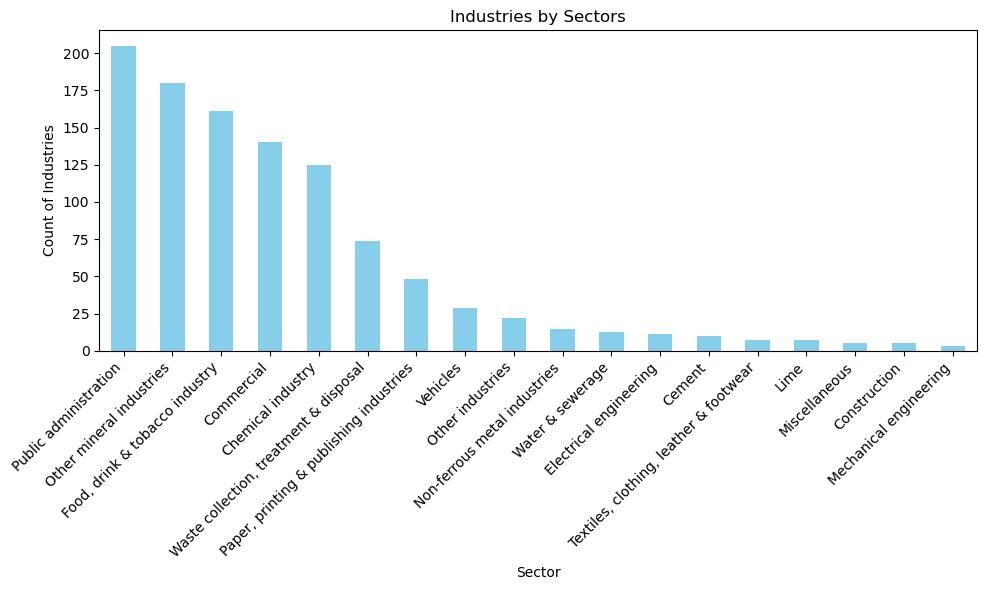

In [45]:


# Now we can create a bar chart to visualize the count of industries by sectors
sector_counts = df['Sector'].value_counts()

# Plotting the bar chart
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sector_counts.plot(kind='bar', color='skyblue')
plt.title('Industries by Sectors')
plt.xlabel('Sector')
plt.ylabel('Count of Industries')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Display the plot
plt.show()


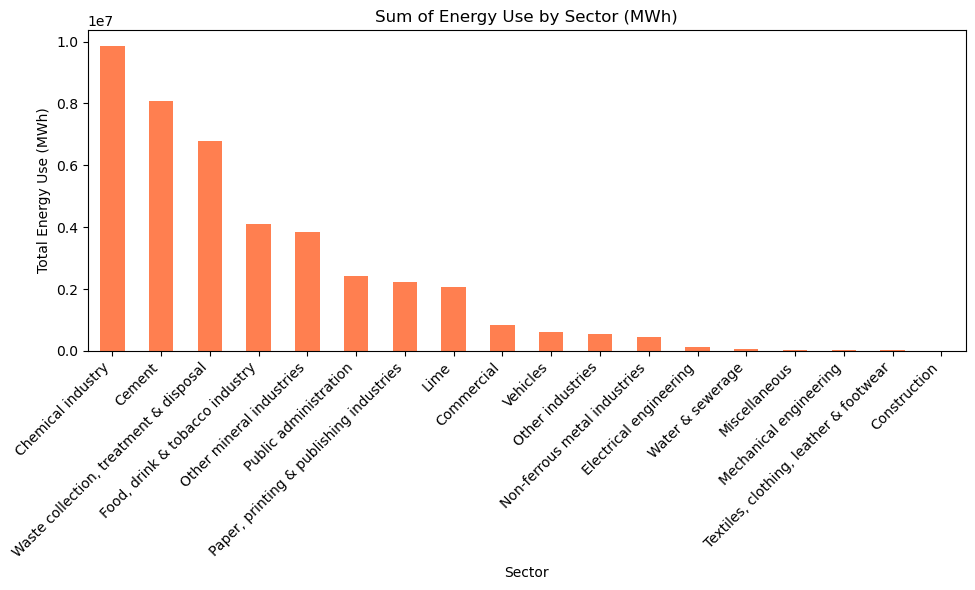

In [46]:
# Group by sector and sum the total energy use
energy_by_sector = df.groupby('Sector')['Total_energy_use_MWh'].sum().sort_values(ascending=False)

# Plotting the bar chart
plt.figure(figsize=(10, 6))
energy_by_sector.plot(kind='bar', color='coral')
plt.title('Sum of Energy Use by Sector (MWh)')
plt.xlabel('Sector')
plt.ylabel('Total Energy Use (MWh)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Display the plot
plt.show()
